#### Question:

Given a Hematoxylin and Eosin stained image as image.png and the corresponding output expected is given as image_gt.png. Your task is to highlight the nuclei as given in the image_gt.png.
Apply necessary image preprocessing techniques to obtain the expected output.

`Import the required libraries`

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

`Function to display the images`

In [2]:
def display(img,name):
    plt.title(name)
    plt.imshow(img,cmap='gray') 
    plt.axis('off')

`Read the image`

In [3]:
input_img = cv2.imread('image.png')
output_img = cv2.imread('image_gt.png')

input_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
output_gray = cv2.cvtColor(output_img, cv2.COLOR_BGR2GRAY)

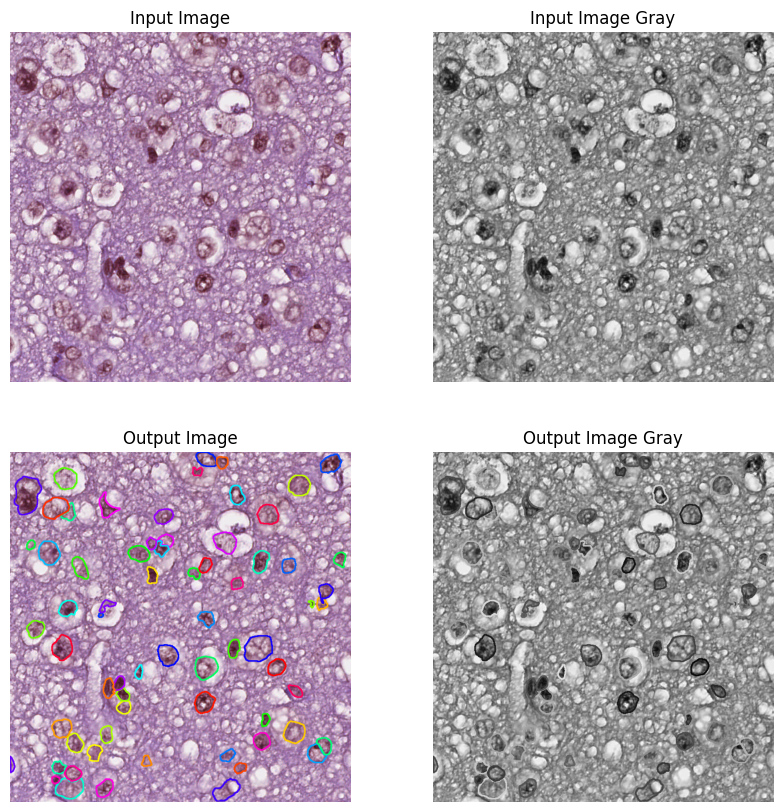

In [4]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1), display(input_img,'Input Image')
plt.subplot(2,2,2), display(input_gray,'Input Image Gray')
plt.subplot(2,2,3), display(output_img,'Output Image')
plt.subplot(2,2,4), display(output_gray,'Output Image Gray')
plt.show()

In [6]:
median = cv2.medianBlur(input_gray, 1)

In [7]:
ret, bin_img = cv2.threshold(median, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

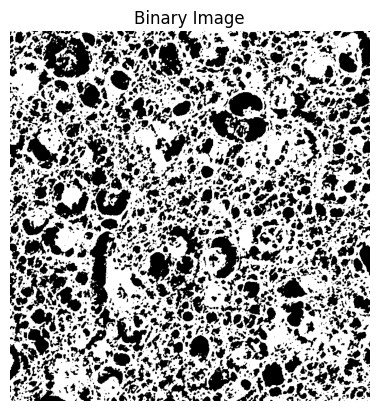

In [8]:
display(bin_img,'Binary Image')

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=2)

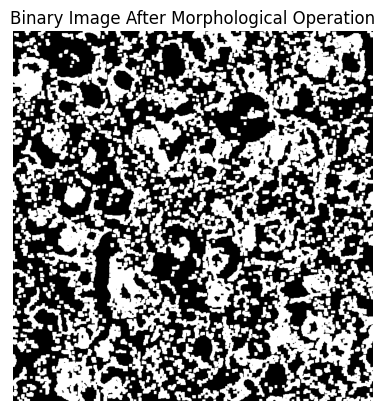

In [10]:
display(bin_img,'Binary Image After Morphological Operation')

In [11]:
# sure background area
sure_bg = cv2.dilate(bin_img, kernel, iterations=3)

# Distance transform
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)

# foreground area
ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)

# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)

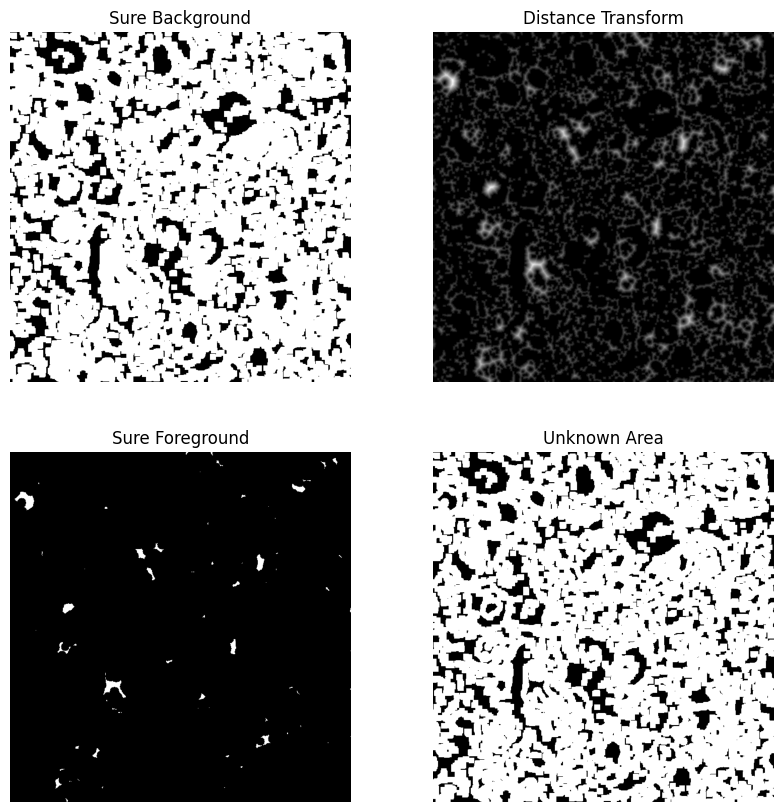

In [12]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1), display(sure_bg,'Sure Background')
plt.subplot(2,2,2), display(dist,'Distance Transform')
plt.subplot(2,2,3), display(sure_fg,'Sure Foreground')
plt.subplot(2,2,4), display(unknown,'Unknown Area')

plt.show()

In [13]:
ret, markers = cv2.connectedComponents(sure_fg)
markers += 1 # Add one to all labels so that background is not 0, but 1
markers[unknown == 255] = 0 # mark the region of unknown with zero

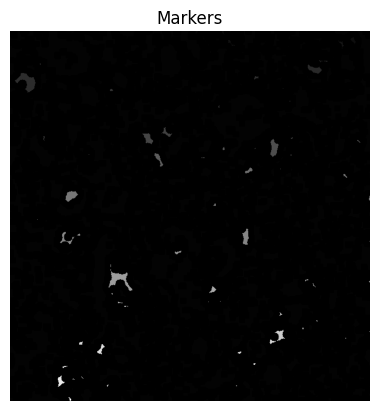

In [14]:
display(markers,'Markers')

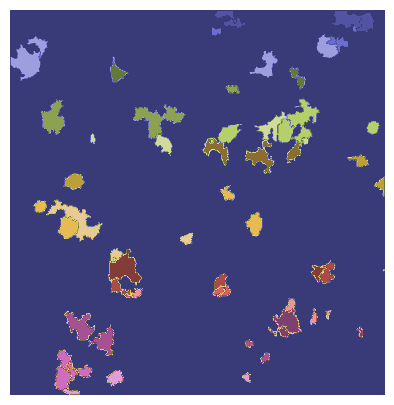

In [18]:
markers = cv2.watershed(input_img, markers)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()
# display(markers,'Markers After Watershed')

In [22]:
labels = np.unique(markers)
 
nuc = []
for label in labels[2:]:  
 
# Create a binary image in which only the area of the label is in the foreground 
#and the rest of the image is in the background   
    target = np.where(markers == label, 255, 0).astype(np.uint8)
   
  # Perform contour extraction on the created binary image
    contours, hierarchy = cv2.findContours( target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    nuc.append(contours[0])
 
# Draw the outline
input_img = cv2.drawContours(input_img, nuc, -1, color=(0, 23, 223), thickness=2)

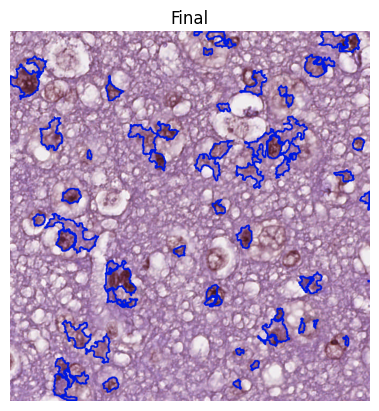

In [23]:
display(input_img,'Final')